# 10th Session

## Ordinary Least Squares (OLS) Regression

### First Step: Create two arbitrary population sets as X and Y (each has 10000 obs)

### pandas library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)

population_size = 10000

X_population = np.random.randint(1, 101, size=population_size)

# Create Y_population as a linear function of X_population with some noise
Y_population = 2 * X_population + np.random.normal(0, 50, population_size) #0 is mean 20 is SD

population_df = pd.DataFrame({'X': X_population, 'Y': Y_population})
population_df.head()
#population_df.tail()
#population_df


,X,Y
0,45,156.732017
1,48,139.795420
2,65,99.051934
3,68,145.296840
4,68,140.622902


## Second Step:  their corrolation

In [2]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(population_df['X'], population_df['Y'])
correlation_matrix


array([[1.        , 0.75618761],
       [0.75618761, 1.        ]])

### The closer SD gets to 0, the closer the corrolation gets to 1

In [3]:
# Extract the correlation value
correlation_value = correlation_matrix[0, 1]
print(f"Correlation value between X_population and Y_population: {correlation_value}")

Correlation value between X_population and Y_population: 0.7561876091009583


### Their distributions

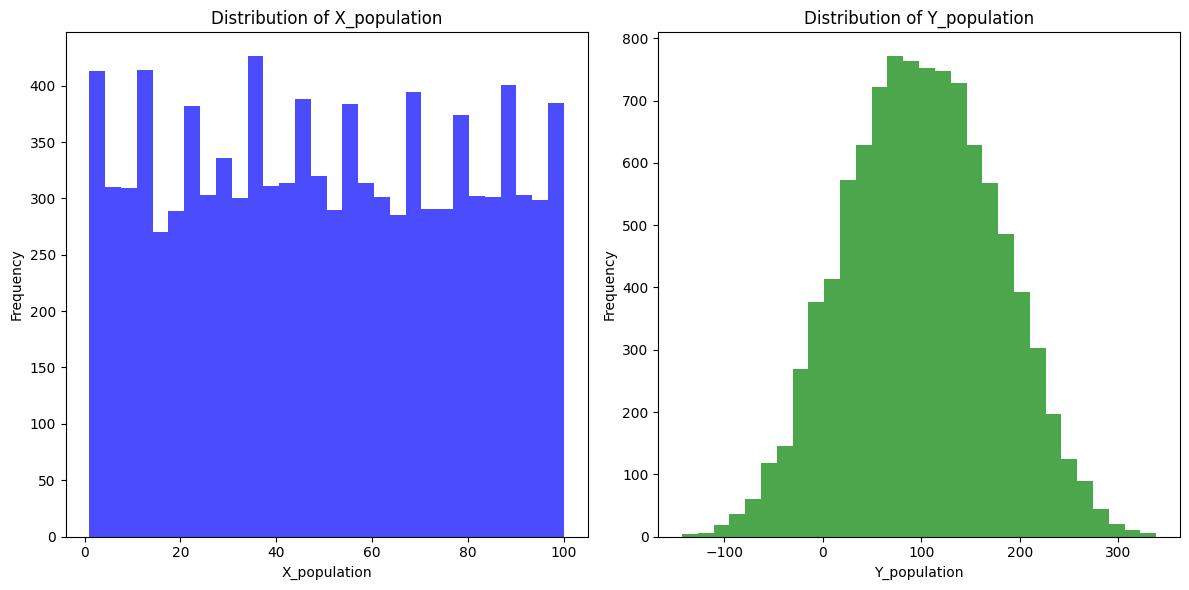

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for X_population
ax1.hist(X_population, bins=30, color='blue', alpha=0.7)
ax1.set_title('Distribution of X_population')
ax1.set_xlabel('X_population')
ax1.set_ylabel('Frequency')

# Histogram for Y_population
ax2.hist(Y_population, bins=30, color='green', alpha=0.7)
ax2.set_title('Distribution of Y_population')
ax2.set_xlabel('Y_population')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Third Step: Creating a sample with 100 obs from population sets

In [5]:
sample_size = 100
sample_rand = np.random.choice(population_size, size = sample_size, replace= False)
x_sample = X_population[sample_rand]
y_sample = Y_population[sample_rand]

print("Population Head: ")
print(population_df.head())
print('\nSample X: ')
print(x_sample)
#print("\nSample Y: ")
#print(y_sample)

Population Head: 
    X           Y
0  45  156.732017
1  48  139.795420
2  65   99.051934
3  68  145.296840
4  68  140.622902

Sample X: 
[65 72 10 38 65 35 79 14  4 28 79 86 48 28 25 47  3 24 16 62 24 67 39 75
 10 94 92 93 98 81 80 47 16 52 65 20 59  5 60 53 95 90 53 11 58 12 72 59
 75 21 64 73 75 53 90 24 37 91 61 49 88 94 24  9 82 55  1 49  8 25  4  8
 19 25 27 34 81 25  7 45 70 89 80 96 81 41 45 47 47 33 43 64 34  5 11 11
  4 90  7 33]


- IF replace= False, sample numbers will be unique

- X_population[sample_rand]:

 Here, sample_rand (which contains the randomly chosen indices) is used to index into X_population, resulting in a subset of X_population that corresponds to the randomly selected indices. This subset is stored in x_sample.

 same goes for Y_population[sample_rand]

## Forth Step: Checking their samples corrolation

In [6]:
correlation_matrix = np.corrcoef(x_sample, y_sample)
correlation_value = correlation_matrix[0, 1]
print(f"Correlation value between X_population and Y_population: {correlation_value}")

Correlation value between X_population and Y_population: 0.7632287631517726


### Their distributions

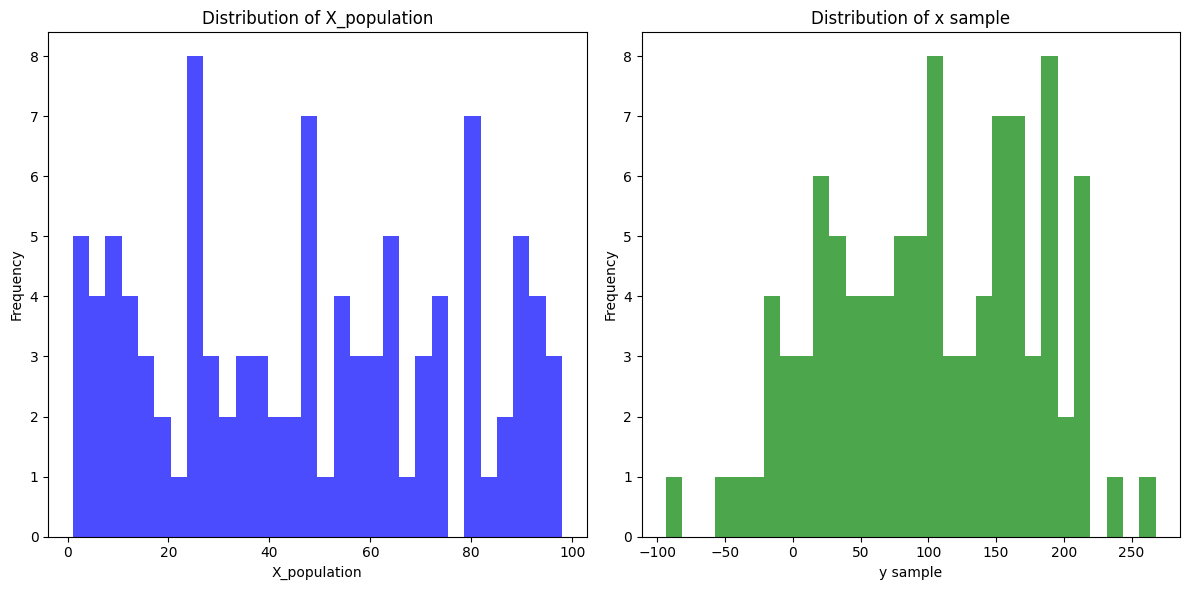

In [7]:
# Plot the distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for X_population
ax1.hist(x_sample, bins=30, color='blue', alpha=0.7)
ax1.set_title('Distribution of X_population')
ax1.set_xlabel('X_population')
ax1.set_ylabel('Frequency')

# Histogram for Y_population
ax2.hist(y_sample, bins=30, color='green', alpha=0.7)
ax2.set_title('Distribution of x sample')
ax2.set_xlabel('y sample')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- In the context of a histogram, bins refers to the number of intervals or “bins” into which the data is divided. Each bin represents a range of values, and the height of the bin indicates the frequency of data points within that range. More bins provide a more detailed view of the data distribution, while fewer bins provide a more generalized view.

## Central Limit Theorem

- when the variable in the for loop is not needed we use _

In [8]:
for _ in range(4):
    print("something")

something
something
something
something


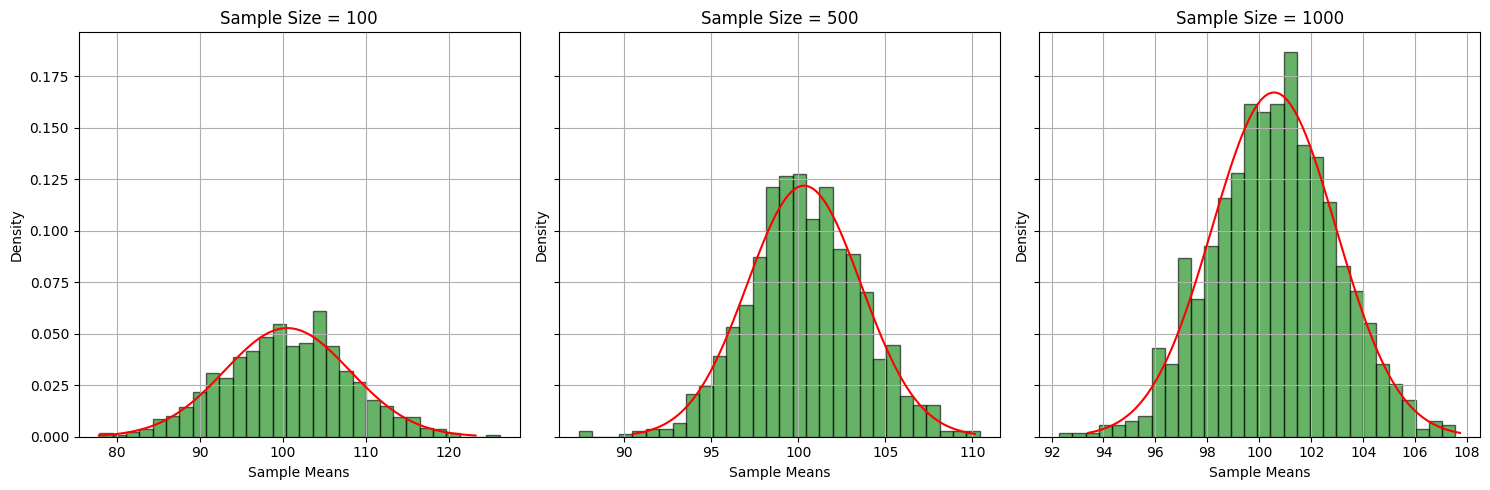

In [9]:
def plot_sample_means(sample_sizes, num_samples):
    fig, axes = plt.subplots(1, len(sample_sizes), figsize=(15, 5), sharey=True)
    
    for i, sample_size in enumerate(sample_sizes):
        sample_means = []
        
        for _ in range(num_samples):
            sample_rand = np.random.choice(range(population_size), size=sample_size, replace=False)
            y_sample = Y_population[sample_rand]
            sample_means.append(np.mean(y_sample))
        
        axes[i].hist(sample_means, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
        
        #the normal distribution curve
        mu = np.mean(sample_means)
        sigma = np.std(sample_means)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        axes[i].plot(x, (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2), color='red')
        
        axes[i].set_title(f'Sample Size = {sample_size}')
        axes[i].set_xlabel('Sample Means')
        axes[i].set_ylabel('Density')
        axes[i].grid()
    
    plt.tight_layout()
    plt.show()

sample_sizes = [100, 500, 1000]  # Different sample sizes to compare
num_samples = 1000  # Number of samples to draw
plot_sample_means(sample_sizes, num_samples)


# Ordinary Least Squares Assumptions

### OLS arims to minimize the sum of the squares of the residuals (the differences between observed and predicted values)

$1st$: $Y = B_{0} + B_{1}X_{1} + U$

- The relation between $Y$ and $X$ is linear. 

- All relevant variables have been included in the model

$2nd$: $E[U]=0$

- No relationship between error term and the $X$ variable (variables unaccounted shouldn't have any relationship with variable $X$)

$3rd$: Error term's variance is homoscedastic. 

$4th$: $Cov(U_{i}, U_{j}) = Cov(Y_{i}, Y_{j}) = 0    i \neq j$

$5th$: Independent variable(s) should exhibit variability in the sample

$6th$: The distribution of error term is normal with a mean and variance



## Applying OLS to population sets

### $ Y = \beta_{0} + \beta_{1}X_{1}$

### OLS regression in statsmodels expects input data to be in a pandas DataFrame or Series format.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                 1.335e+04
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:15:06   Log-Likelihood:                -53320.
No. Observations:               10000   AIC:                         1.066e+05
Df Residuals:                    9998   BIC:                         1.067e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0182      1.004     -0.018      0.9

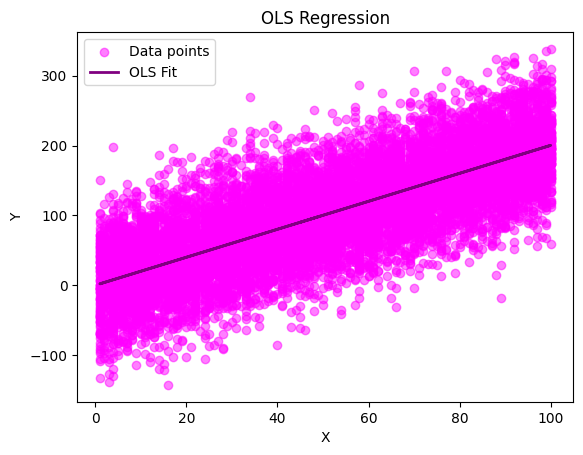

In [10]:
import statsmodels.api as sm

X = population_df['X']
Y = population_df['Y']

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

# Plotting the results
plt.scatter(population_df['X'], population_df['Y'], alpha=0.5, label='Data points', color = 'magenta')
plt.plot(population_df['X'], model.predict(X), color='purple', label='OLS Fit', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('OLS Regression')
plt.legend()
plt.show()

### Reason for 
- Adding a constant to the independent variable (intercept)

* X = sm.add_constant(X)

The intercept represents the expected value of $Y$ when $X$ is zero. Without an intercept, the regression line would be forced to pass through the origin (0,0), which may not be appropriate (Because of real-world relationships, bias in predictions, loss of flexibility, statistical properties, and interpretation issues) for most datasets. 

Matrix Representation:

When performing regression analysis, especially using libraries like statsmodels, the independent variables $X$ are often represented in matrix form. To include an intercept in this matrix, a column of ones must be added to $X$.
$$
X' = \begin{bmatrix}
1 & X_1 \\
1 & X_2 \\
\vdots & \vdots \\
1 & X_n
\end{bmatrix}
$$

Here, the first column consists of ones, allowing the regression model to estimate the intercept $\beta_{0}$

### In the example above, if we remove intercept $R^2$ will be 0.843 but with intercept it is 0.572.

Reasons are:

Potential Overfitting: The model might be fitting the data too closely, capturing noise rather than the true underlying relationship.

Inappropriate Model Assumption: Forcing the line through the origin assumes that the relationship between $X$ and $Y$ passes through (0,0), which is not be valid for our dataset.

## Applying OLS to sample sets

### $ Y = \beta_{0} + \beta_{1}X_{1} + \varepsilon$


OLS Regression Results for Sample:
                            OLS Regression Results                            
Dep. Variable:                    Y_s   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     136.7
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           2.70e-20
Time:                        18:15:06   Log-Likelihood:                -530.95
No. Observations:                 100   AIC:                             1066.
Df Residuals:                      98   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7

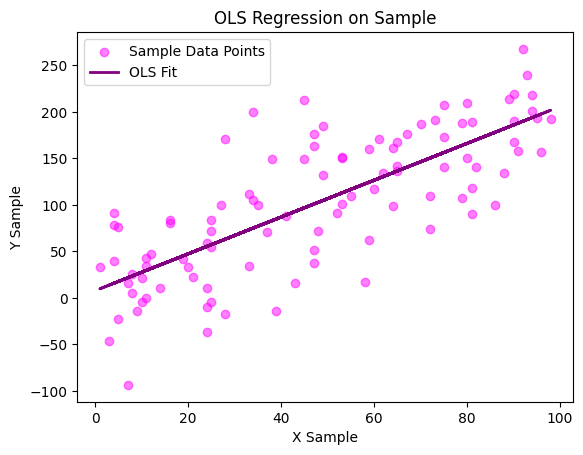

In [11]:
sample_df = pd.DataFrame({
    'X_s' : x_sample,
    'Y_s': y_sample
})

X_sample = sample_df['X_s']
Y_sample = sample_df['Y_s']

X_sample = sm.add_constant(X_sample)

model_sample = sm.OLS(Y_sample, X_sample).fit()

# Print the OLS regression results
print("\nOLS Regression Results for Sample:")
print(model_sample.summary())

# Plotting the results
plt.scatter(sample_df['X_s'], Y_sample, alpha=0.5, label='Sample Data Points', color = 'magenta')
plt.plot(sample_df['X_s'], model_sample.predict(X_sample), color='purple', label='OLS Fit', linewidth=2)
plt.xlabel('X Sample')
plt.ylabel('Y Sample')
plt.title('OLS Regression on Sample')
plt.legend()
plt.show()


## Checking Linearity, Homoscedasticity, Independence, and Normality of Errors

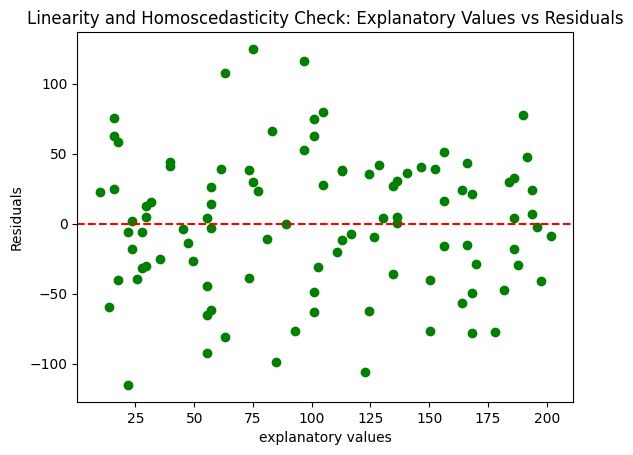

In [12]:
explanatory_values = model_sample.predict(X_sample)

residuals = Y_sample - explanatory_values

plt.scatter(explanatory_values, residuals, color = 'g')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('explanatory values')
plt.ylabel('Residuals')
plt.title('Linearity and Homoscedasticity Check: Explanatory Values vs Residuals')
plt.show()


Interpretation of Durbin-watson test: Values close to 2 indicate no autocorrelation. Values < 1.5 suggest positive autocorrelation, and values > 2.5 suggest negative autocorrelation.

In [13]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw_statistic = durbin_watson(model_sample.resid)
print(f'Durbin-Watson Statistic: {dw_statistic}')

Durbin-Watson Statistic: 1.978757039049103


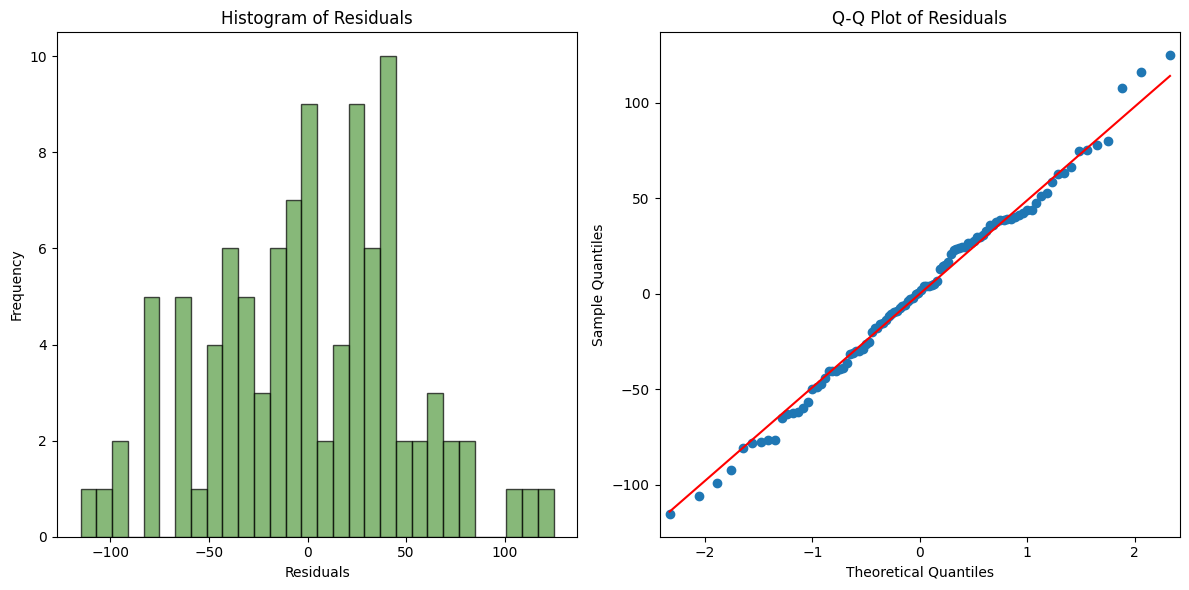

In [14]:
fig, (ax11, ax22) = plt.subplots(1, 2, figsize=(12, 6))

ax11.hist(residuals, bins=30, color='#549A40', edgecolor='k', alpha=0.7)
ax11.set_title('Histogram of Residuals')
ax11.set_xlabel('Residuals')
ax11.set_ylabel('Frequency')

sm.qqplot(residuals, line='s', ax=ax22)
ax22.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

## BLUE

## The estimators are unbiased

- $E[b_{0}] = B_{0}$

- $E[b_{1}] = B_{1}$

### The following code aims to simulate the sampling distribution of the OLS estimators by repeatedly drawing samples from the population and estimating the regression coefficients. By doing so, it provides insights into the variability and average performance of the OLS estimators compared to the true population parameters.

In [20]:
num_simulations = 1000
sample_size = 100
estimated_slopes = []
estimated_intercepts = []

true_slope_or_B1 = 2.0041
true_intercept_or_B0 = -0.0182

# Run simulations
for _ in range(num_simulations):
    sample_indices = np.random.choice(population_size, size=sample_size, replace=False)
    x_sample = X_population[sample_indices]
    y_sample = Y_population[sample_indices]

    X_sample = sm.add_constant(x_sample) 
    model = sm.OLS(y_sample, X_sample).fit()

    estimated_intercepts.append(model.params[0])  # The intercept coefficient
    estimated_slopes.append(model.params[1])  # The slope coefficient

average_slope = np.mean(estimated_slopes)
average_intercept = np.mean(estimated_intercepts)

print(f"True Population Slope (beta1): {true_slope_or_B1}")
print(f"Average Estimated Slope from Simulations: {average_slope}")
print(f"True Population Intercept (beta0): {true_intercept_or_B0}")
print(f"Average Estimated Intercept from Simulations: {average_intercept}")

True Population Slope (beta1): 2.0041
Average Estimated Slope from Simulations: 2.0047982190339986
True Population Intercept (beta0): -0.0182
Average Estimated Intercept from Simulations: 0.15848803965199784


## Consistency
- with larger samples, the estimators become more accurate and reliable

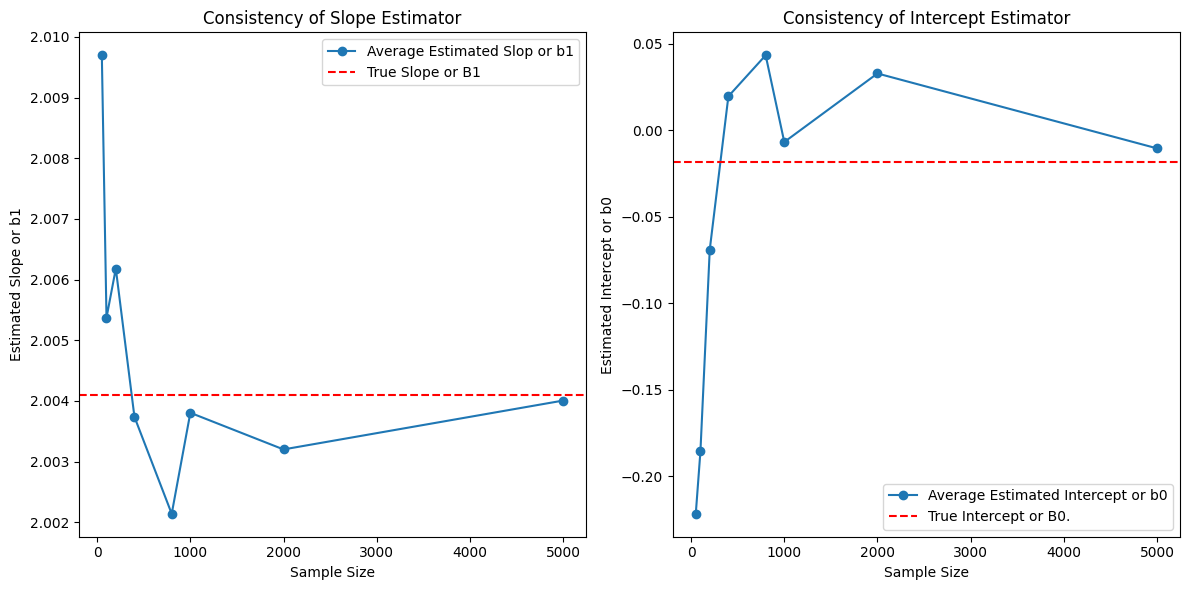

Sample Size: 50
Average Estimated Slope: 2.0096967782914588, Variance: 0.0636417954563124
Average Estimated Intercept: -0.2216513576265045, Variance: 207.40870723703412

Sample Size: 100
Average Estimated Slope: 2.005371068851352, Variance: 0.030683057970323994
Average Estimated Intercept: -0.1855583837230762, Variance: 97.32082455637725

Sample Size: 200
Average Estimated Slope: 2.006182057373219, Variance: 0.015319786739329436
Average Estimated Intercept: -0.06905324677394196, Variance: 53.175656611731284

Sample Size: 400
Average Estimated Slope: 2.0037377294881953, Variance: 0.007845069285012836
Average Estimated Intercept: 0.01954015266241339, Variance: 25.275751103472775

Sample Size: 800
Average Estimated Slope: 2.002140363679976, Variance: 0.0033455956232837807
Average Estimated Intercept: 0.043270369956201975, Variance: 11.147762278740277

Sample Size: 1000
Average Estimated Slope: 2.003805111942757, Variance: 0.0028413850206836806
Average Estimated Intercept: -0.0068561559323

In [ ]:
num_simulations = 1000
sample_sizes = [50, 100, 200, 400, 800, 1000, 2000, 5000]  # Different sample sizes
average_slopes = []
average_intercepts = []
variances_slopes = []
variances_intercepts = []

for sample_size in sample_sizes:
    estimated_slopes = []
    estimated_intercepts = []
    
    for _ in range(num_simulations):
        sample_r = np.random.choice(population_size, size=sample_size, replace=False)
        x_sample = X_population[sample_r]
        y_sample = Y_population[sample_r]

        X_sample = sm.add_constant(x_sample)  
        model = sm.OLS(y_sample, X_sample).fit()

        estimated_intercepts.append(model.params[0])  
        estimated_slopes.append(model.params[1])  

    average_slopes.append(np.mean(estimated_slopes))
    average_intercepts.append(np.mean(estimated_intercepts))

    variances_slopes.append(np.var(estimated_slopes, ddof=1))  
    variances_intercepts.append(np.var(estimated_intercepts, ddof=1))  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sample_sizes, average_slopes, marker='o', label='Average Estimated Slop or b1')
plt.axhline(y=true_slope_or_B1, color='r', linestyle='--', label='True Slope or B1')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Slope or b1')
plt.title('Consistency of Slope Estimator')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, average_intercepts, marker='o', label='Average Estimated Intercept or b0')
plt.axhline(y=true_intercept_or_B0, color='r', linestyle='--', label='True Intercept or B0.')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Intercept or b0')
plt.title('Consistency of Intercept Estimator')
plt.legend()

plt.tight_layout()
plt.show()

for i, sample_size in enumerate(sample_sizes):
    print(f"Sample Size: {sample_size}")
    print(f"Average Estimated Slope: {average_slopes[i]}, Variance: {variances_slopes[i]}")
    print(f"Average Estimated Intercept: {average_intercepts[i]}, Variance: {variances_intercepts[i]}")
    print()